<a href="https://colab.research.google.com/github/pratikdeshmukh21/AI_Playing_CartPole/blob/main/AI_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym torch matplotlib


In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import gym
from collections import deque
import torch.nn.functional as F


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import gym

# Initialize the gym environment
env = gym.make('CartPole-v1')

# Define the neural network model
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.99  # Discount factor
        self.epsilon = 1.0  # Exploration factor
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = DQN(state_size, action_size).to(device)
        self.optimizer = optim.Adam(self.model.parameters())
        self.criterion = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Random action
        state = torch.tensor(state, dtype=torch.float32).to(device)
        q_values = self.model(state)
        return torch.argmax(q_values).item()  # Choose action with highest Q-value

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state = torch.tensor(state, dtype=torch.float32).to(device)
            next_state = torch.tensor(next_state, dtype=torch.float32).to(device)
            target = reward

            # If not done, calculate the target Q-value using the next state
            if not done:
                next_q_values = self.model(next_state.unsqueeze(0))  # (1, action_size)
                target += self.gamma * torch.max(next_q_values).item()

            # Get current Q-value predictions for the current state
            target_f = self.model(state.unsqueeze(0))  # (1, action_size)

            target_f = target_f[0]  # Flatten the batch dimension to get a (action_size,) tensor

            # Ensure action is within bounds
            if action < len(target_f):
                target_f[action] = target
            else:
                print(f"Invalid action: {action}, target_f size: {len(target_f)}")
                continue  # Skip invalid actions

            self.optimizer.zero_grad()
            loss = self.criterion(target_f.unsqueeze(0), target_f.unsqueeze(0))  # Calculate loss
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Set device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get state and action sizes
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Create the agent
agent = DQNAgent(state_size, action_size)

# Training parameters
episodes = 1000
batch_size = 32
reward_history = []

# Training loop
for e in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])

        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    reward_history.append(total_reward)
    agent.replay(batch_size)  # Train the agent using experiences from memory

    if (e + 1) % 10 == 0:
        print(f"Episode {e + 1}/{episodes}, Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

    if np.mean(reward_history[-100:]) >= 195.0:
        print(f"Solved in episode {e + 1}")
        break


Streaming output truncated to the last 5000 lines.
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid action: 1, target_f size: 1
Invalid actio

In [ ]:
# Test the trained agent
for episode in range(5):  # Test for 5 episodes
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    done = False

    while not done:
        env.render()  # Uncomment this line to see the environment
        state_tensor = torch.tensor(state, dtype=torch.float32)
        action = torch.argmax(agent.model(state_tensor)).item()
        next_state, reward, done, _ = env.step(action)
        state = np.reshape(next_state, [1, state_size])
        total_reward += reward

    print(f"Episode {episode+1}, Reward: {total_reward}")


/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_reso

Episode 1, Reward: 19.0
Episode 2, Reward: 18.0
Episode 3, Reward: 19.0
Episode 4, Reward: 14.0
Episode 5, Reward: 11.0


In [ ]:
# After training each episode, track the average reward
for e in range(episodes):
    # Your training code here (the environment reset, action, etc.)

    # Track the reward history
    reward_history.append(total_reward)  # Track the total reward for this episode

    # Every 100 episodes, calculate and print the average reward of the last 100 episodes
    if (e + 1) % 100 == 0:
        avg_reward = np.mean(reward_history[-100:])
        print(f"Episode {e+1}/{episodes}, Avg Reward (last 100): {avg_reward:.2f}, Epsilon: {agent.epsilon:.2f}")

        if avg_reward >= 195:  # CartPole is considered solved when average reward > 195
            print("Environment Solved!")
            break  # Exit the loop if the environment is solved

    # Continue the rest of your code (model training, experience replay, etc.)


Episode 100/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 200/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 300/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 400/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 500/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 600/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 700/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 800/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 900/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 1000/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 1100/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 1200/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 1300/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 1400/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 1500/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
Episode 1600/5000, Avg Reward (last 100): 11.00, Epsilon: 0.01
E

In [ ]:
# Save the model after training
torch.save(agent.model.state_dict(), 'dqn_cartpole_model.pth')


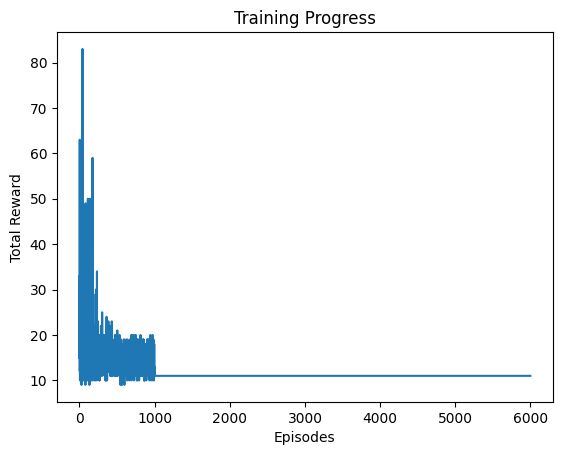

In [ ]:
import matplotlib.pyplot as plt

plt.plot(reward_history)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.show()
